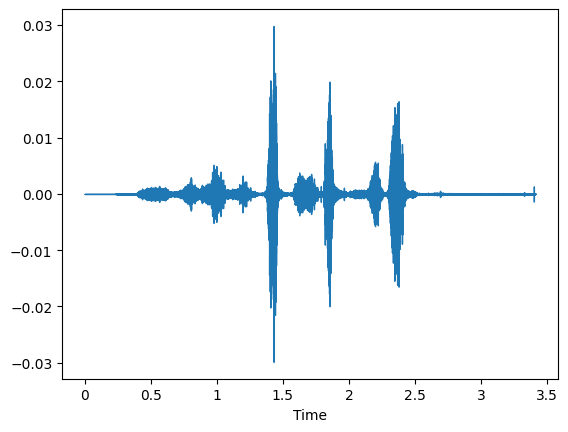

In [1]:
import librosa
from IPython.display import Audio, display
filename = "AI in speech processing.wav"
y, sr = librosa.load(filename)
import numpy as np
f_d = np.array([y[1] - 2*y[0]])
for i in range(1,len(y)-1):
    f_d = np.append(f_d,y[i-1] + y[i+1] - 2*y[i])
f_d
librosa.display.waveshow(f_d)

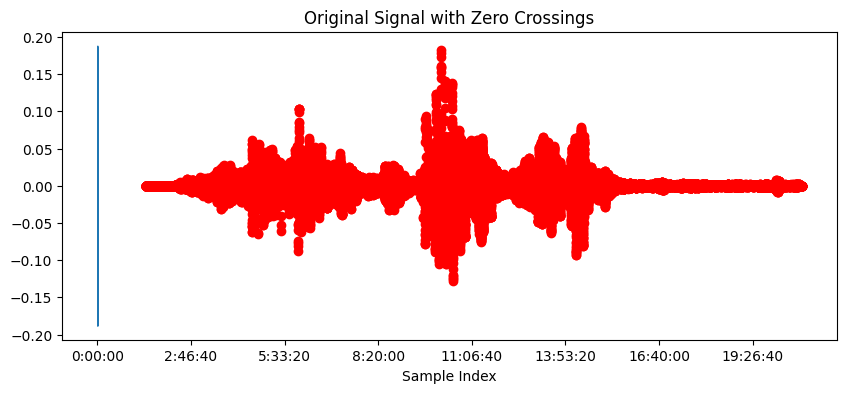

Zero Crossing Points: [5155.0, 5158.428533036909, 5160.257376106605, 5161.467246018178, 5162.340464516243, 5163.45151281812, 5165.475778919258, 5167.835248647298, 5169.444645713798, 5170.5016488228475, 5171.522504239675, 5172.567208556513, 5173.6607198554075, 5174.824300310695, 5176.319459749252, 5177.4977998689, 5178.861740194283, 5181.301093597073, 5183.114351191951, 5184.441086732064, 5185.680016956608, 5187.630736986788, 5188.4714213063835, 5189.248618525404, 5190.590260824371, 5191.627716002088, 5192.34485968693, 5193.47435087597, 5194.744786444333, 5195.849022399664, 5196.11780167335, 5197.4823400785135, 5199.259338480048, 5200.816727740082, 5201.370814234821, 5202.329142315106, 5203.781573483274, 5205.02161819773, 5206.196950722506, 5207.536105752327, 5208.523390865627, 5209.442982666669, 5210.568153260488, 5211.520024870325, 5212.42628832387, 5213.589744568842, 5214.486598063253, 5215.483345563746, 5216.437292597448, 5217.337100622738, 5218.814537910944, 5220.646107604642, 5221

In [6]:
import librosa
import numpy as np

# Load the audio file
filename = 'AI in speech processing.wav'
y, sr = librosa.load(filename)

# Applying the finite difference method
df = np.array([y[1] - 2 * y[0]])
for i in range(1, len(y) - 1):
    df = np.append(df, y[i - 1] + y[i + 1] - 2 * y[i])

# Find zero-crossing points
zero_crossings = []
for i in range(1, len(df)):
    if (df[i - 1] >= 0 and df[i] < 0) or (df[i - 1] < 0 and df[i] >= 0):
        # Linear interpolation to find the exact zero-crossing point
        zero_crossing = i - df[i - 1] / (df[i] - df[i - 1])
        zero_crossings.append(zero_crossing)

# Plot only the zero-crossing points
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.scatter(zero_crossings, [y[int(zc)] for zc in zero_crossings], color='red', label='Zero Crossing')
plt.title('Original Signal with Zero Crossings')
plt.xlabel('Sample Index')
plt.show()

# Classify regions as speech or silence based on zero-crossing differences
zero_crossing_diffs = np.diff(zero_crossings)
threshold = np.mean(zero_crossing_diffs)  # adjust the threshold as needed

speech_regions = zero_crossing_diffs[zero_crossing_diffs < threshold]
silence_regions = zero_crossing_diffs[zero_crossing_diffs >= threshold]

# Calculate average lengths
avg_length_speech = np.mean(speech_regions) if len(speech_regions) > 0 else 0
avg_length_silence = np.mean(silence_regions) if len(silence_regions) > 0 else 0

print("Zero Crossing Points:", zero_crossings)
print("Average Length between Consecutive Zero-Crossings (Speech):", avg_length_speech)
print("Average Length between Consecutive Zero-Crossings (Silence):", avg_length_silence)


In [8]:
!pip install pydub


In [9]:
from pydub import AudioSegment
import numpy as np

def get_signal_length(audio_file):
    # Load audio file
    audio = AudioSegment.from_file(audio_file, format="m4a")

    # Extract signal data
    signal_data = np.array(audio.get_array_of_samples())

    # Calculate signal length
    signal_length = len(signal_data)

    return signal_length

# List of your favorite words
your_words = ["word1", "word2", "word3", "word4", "word5"]

# File paths for your spoken words
your_audio_files = ["books_v.m4a", "food_v.m4a", "movies_v.m4a", "music_v.m4a", "purple_v.m4a"]

# Calculate and print the lengths of your spoken words
for word, audio_file in zip(your_words, your_audio_files):
    length = get_signal_length(audio_file)
    print(f"Length of {word}: {length} samples")


team_mate_words = ["mate_word1", "mate_word2", "mate_word3", "mate_word4", "mate_word5"]
team_mate_audio_files = ["books_s.m4a", "food_s.m4a", "movies_s.m4a", "music_s.m4a", "purple_s.m4a"]

# Calculate and print the lengths of your team-mate's spoken words
for word, audio_file in zip(team_mate_words, team_mate_audio_files):
    length = get_signal_length(audio_file)
    print(f"Length of {word}: {length} samples")


Length of word1: 256000 samples
Length of word2: 219136 samples
Length of word3: 215040 samples
Length of word4: 206848 samples
Length of word5: 229376 samples
Length of mate_word1: 229376 samples
Length of mate_word2: 215040 samples
Length of mate_word3: 196608 samples
Length of mate_word4: 206848 samples
Length of mate_word5: 249856 samples


<ipython-input-10-d2d53436f32a>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


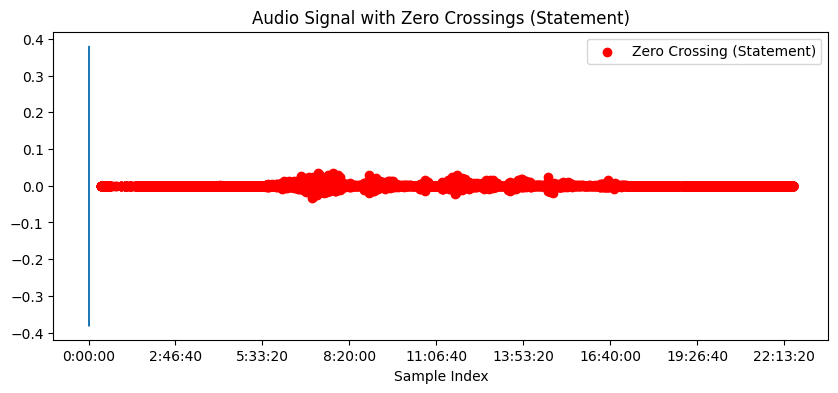

Zero Crossing Points (Statement): [ 1470  1473  1475 ... 81047 81048 81053]


<ipython-input-10-d2d53436f32a>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


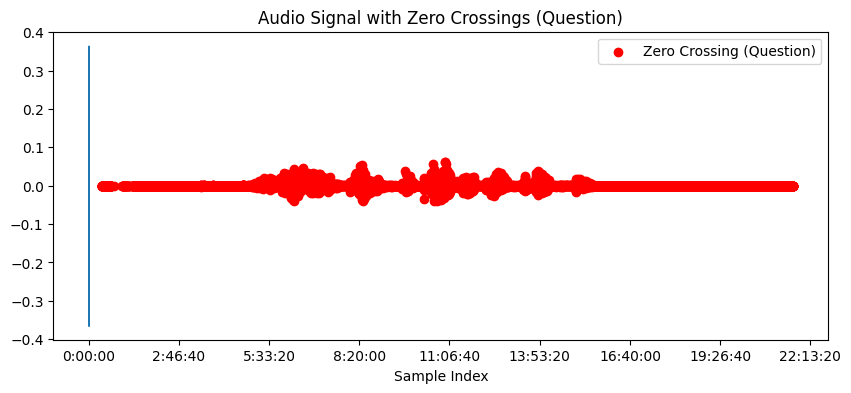

Zero Crossing Points (Question): [ 1470  1473  1474 ... 78073 78074 78085]


In [10]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def analyze_audio(audio_file, label):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Calculate zero-crossing points
    zero_crossings = np.where(np.diff(np.sign(y)))[0]

    # Plot zero-crossing points
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.scatter(zero_crossings, [y[int(zc)] for zc in zero_crossings], color='red', label=f'Zero Crossing ({label})')
    plt.title(f'Audio Signal with Zero Crossings ({label})')
    plt.xlabel('Sample Index')
    plt.legend()
    plt.show()

    # Printing the zero-crossing points
    print(f"Zero Crossing Points ({label}):", zero_crossings)


statement_audio_file = 'stat.m4a'
question_audio_file = 'ques.m4a'

# Analyzing the statement audio
analyze_audio(statement_audio_file, 'Statement')

# Analyzing the question audio
analyze_audio(question_audio_file, 'Question')
